# Data Load, Cleaning

In [ ]:
def loadData():    
    import pandas as pd
    import numpy as np

    filepath='combined_emissions_sources2.csv'
        # Step 1: Load the CSV file into a pandas DataFrame
    try:
        print(f"Loading data from '{filepath}'...")
        df = pd.read_csv(filepath)
        print("Data loaded successfully.")
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found.")
        print("Please make sure you have already run the first script to generate this file,")
        print("and that it is in the same directory as this script.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
    # Step 2: Display the size of the DataFrame (rows, columns)
    rows, cols = df.shape
    print("\n--- DataFrame Size ---")
    print(f"The DataFrame has {rows} rows and {cols} columns.")
    return df

In [ ]:
df=loadData()

Loading data from 'combined_emissions_sources2.csv'...


/var/folders/t9/jw8v20856t3c_21v8gyprxlm0000gn/T/ipykernel_52466/1584691916.py:79: DtypeWarning: Columns (2,10,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,47,48,49,50,51,52,53,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


Data loaded successfully.

--- DataFrame Size ---
The DataFrame has 2293428 rows and 63 columns.


In [119]:
df = df.dropna(subset=['start_time'])
# --- 2. Identify and Drop Columns with Nulls > 100,000 ---
threshold = 100000
null_counts = df.isnull().sum()
columns_to_drop = null_counts[null_counts > threshold].index.tolist()

if not columns_to_drop:
    print("No columns have more than 100,000 null values. No columns were dropped.")
else:

    print(f"--- Columns to be Dropped (>{threshold} nulls) ---")
    print(columns_to_drop)
    print("\n--- Columns Dropped ---")
    print(f"Old shape of DataFrame: {df.shape}")
    df.drop(columns=columns_to_drop, axis=1, inplace=True)
    print(f"New shape of the DataFrame: {df.shape}")

columns_to_drop=['modified_date','source_id','iso3_country']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(df.columns)



# --- 2. Find and Display Null Value Counts ---
null_counts = df.isnull().sum()
df_imputed = df.copy()
sector_null_count = df_imputed['sector'].isnull().sum()
if sector_null_count > 0:
    df_imputed.dropna(subset=['sector'], inplace=True)

print("--- Imputing Missing Values ---")
# Loop through each column to apply the correct imputation strategy
for col in df_imputed.columns:
    if df_imputed[col].isnull().any():
        # STRATEGY 1: For non-numeric (object/categorical) columns
        if df_imputed[col].dtype == 'object':
            mode_value = df_imputed[col].mode()[0]
            df_imputed[col].fillna(mode_value, inplace=True)
            print(f"Imputed non-numeric column '{col}' with mode: '{mode_value}'")
            
        # STRATEGY 2: For numeric (float/int) columns
        else:
            mean_value = df_imputed[col].mean()
            df_imputed[col].fillna(mean_value, inplace=True)
            print(f"Imputed numeric column '{col}' with mean: {mean_value:.2f}")

print("\nImputation complete.")
print("\n--- Null values count after imputation ---")
display(df_imputed.isnull().sum().sum())

--- Columns to be Dropped (>100000 nulls) ---
['source_type', 'lat', 'lon', 'geometry_ref', 'other1', 'other1_def', 'other2', 'other2_def', 'other3', 'other3_def', 'other4', 'other4_def', 'other5', 'other5_def', 'other6', 'other6_def', 'other7', 'other7_def', 'other8', 'other8_def', 'other9', 'other9_def', 'other10', 'other10_def', 'lat_lon', 'sector_id', 'parent_name', 'parent_entity_id', 'parent_entity_type', 'parent_lei', 'parent_permid', 'parent_registration_country', 'parent_headquarter_country', 'overall_share_percent', 'ownership_path', 'ownership_path_datasource_ids', 'immediate_source_owner', 'immediate_source_owner_entity_id', 'source_operator', 'source_operator_id', 'source_sector', 'source_subsector']

--- Columns Dropped ---
Old shape of DataFrame: (2288120, 63)
New shape of the DataFrame: (2288120, 21)
Index(['source_name', 'sector', 'subsector', 'start_time', 'end_time', 'gas',
       'emissions_quantity', 'temporal_granularity', 'activity',
       'activity_units', 'emi

/var/folders/t9/jw8v20856t3c_21v8gyprxlm0000gn/T/ipykernel_52466/1373386068.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(mean_value, inplace=True)


Imputed numeric column 'activity' with mean: 9721118.45
Imputed numeric column 'emissions_factor' with mean: 1.73
Imputed numeric column 'capacity' with mean: 664091.52
Imputed numeric column 'capacity_factor' with mean: 9064.21

Imputation complete.

--- Null values count after imputation ---


0

In [120]:
# Step 4: Display unique values from the 'source_name' column
print("\n--- Unique Values in 'sectors' ---")
if 'sector' in df_imputed.columns:
    unique_sectors = df_imputed['sector'].unique()
    print(f"Found {len(unique_sectors)} unique source names. Displaying a sample:")
    # Display the first 15 unique names, or all if less than 15
    display_limit = min(15, len(unique_sectors))
    for i, name in enumerate(unique_sectors[:display_limit]):
        print(f"- {name}")
    if len(unique_sectors) > display_limit:
        print(f"... and {len(unique_sectors) - display_limit} more.")
else:
    print("The column 'sector' was not found in the DataFrame.")

all_null_rows_count = df_imputed.isnull().all(axis=1).sum()
print(f"Contains {all_null_rows_count} rows where all values are null.")
print(f"The shape of current cleaned df: {df.shape}")


--- Unique Values in 'sectors' ---
Found 9 unique source names. Displaying a sample:
- agriculture
- power
- buildings
- transportation
- fossil-fuel-operations
- mineral-extraction
- manufacturing
- forestry-and-land-use
- waste
Contains 0 rows where all values are null.
The shape of current cleaned df: (2288120, 18)


In [121]:
import pandas as pd
import numpy as np

def impute_categorical_with_percentiles(df, columns):
    label_to_quantile = {
        'very high': 0.95,
        'high': 0.90,
        'medium': 0.65,
        'low': 0.45,
        'very low': 0.35,
    }
    
    for col in columns:
        if col not in df.columns:
            print(f"Warning: column '{col}' not found. Skipping.")
            continue

        s = df[col].astype(str)
        numeric_series = pd.to_numeric(df[col], errors='coerce')
        numeric_only = numeric_series.dropna()

        if numeric_only.empty:
            print(f"Warning: column '{col}' has no numeric data to compute percentiles. Skipping.")
            df[col] = pd.to_numeric(df[col], errors='coerce')
            continue

        qvals = numeric_only.quantile([
            label_to_quantile['very high'],
            label_to_quantile['high'],
            label_to_quantile['medium'],
            label_to_quantile['low'],
            label_to_quantile['very low']
        ])
        # Map quantile index back to labels
        pmap = {
            'very high': qvals.loc[label_to_quantile['very high']],
            'high': qvals.loc[label_to_quantile['high']],
            'medium': qvals.loc[label_to_quantile['medium']],
            'low': qvals.loc[label_to_quantile['low']],
            'very low': qvals.loc[label_to_quantile['very low']],
        }

        s_clean = s.str.strip().str.lower().replace(pmap)
        df[col] = pd.to_numeric(s_clean, errors='coerce')

        # Report
        print(f"Processed '{col}': converted to float. Percentiles used: "
              f"very high={pmap['very high']:.6g}, high={pmap['high']:.6g}, "
              f"medium={pmap['medium']:.6g}, low={pmap['low']:.6g}, very low={pmap['very low']:.6g}")

    return df


In [122]:
cols_to_fix = ['capacity','capacity_factor','activity','emissions_factor','emissions_quantity']

impute_categorical_with_percentiles(df_imputed, cols_to_fix)
for c in cols_to_fix:
    if c in df_imputed.columns:
        print(c, df_imputed[c].dtype, "-> sample:", df_imputed[c].dropna().head().tolist())

print("\n--- Time Clean Ups ---\n")
import pandas as pd
df_imputed['start_time'] = pd.to_datetime(df_imputed['start_time'], infer_datetime_format=True)
df_imputed['end_time']   = pd.to_datetime(df_imputed['end_time'], infer_datetime_format=True)

# Optional: verify conversion
print(df_imputed[['start_time', 'end_time']].dtypes)
print(df_imputed[['start_time', 'end_time']].head())

# Add time features
df_imputed['year'] = df_imputed['start_time'].dt.year
df_imputed['month'] = df_imputed['start_time'].dt.month

Processed 'capacity': converted to float. Percentiles used: very high=3.15138e+06, high=797622, medium=658, low=111.705, very low=41.2228
Processed 'capacity_factor': converted to float. Percentiles used: very high=68517, high=23559.1, medium=16.4542, low=1, very low=0.211763
Processed 'activity': converted to float. Percentiles used: very high=3.04352e+07, high=6.73497e+06, medium=29954.9, low=378.218, very low=59.3257
Processed 'emissions_factor': converted to float. Percentiles used: very high=2.18699, high=1, medium=0.0370096, low=0.000312874, very low=0.000120696
Processed 'emissions_quantity': converted to float. Percentiles used: very high=24190.3, high=7386.65, medium=205.968, low=16.107, very low=3.23942
capacity float64 -> sample: [3151382.15356619, 3151382.15356619, 3151382.15356619, 3151382.15356619, 3151382.15356619]
capacity_factor float64 -> sample: [0.0290888037657042, 0.0409458406480666, 0.11564882188291, 0.159468391353273, 0.105119361656534]
activity float64 -> sample

/var/folders/t9/jw8v20856t3c_21v8gyprxlm0000gn/T/ipykernel_52466/2654991560.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_imputed['start_time'] = pd.to_datetime(df_imputed['start_time'], infer_datetime_format=True)
/var/folders/t9/jw8v20856t3c_21v8gyprxlm0000gn/T/ipykernel_52466/2654991560.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_imputed['end_time']   = pd.to_datetime(df_imputed['end_time'], infer_datetime_format=True)


start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object
  start_time   end_time
0 2021-01-01 2021-01-31
1 2021-02-01 2021-02-28
2 2021-03-01 2021-03-31
3 2021-04-01 2021-04-30
4 2021-05-01 2021-05-31


In [123]:
import pandas as pd
null_counts = df_imputed.isnull().sum()
print(null_counts)


source_name               0
sector                    0
subsector                 0
start_time                0
end_time                  0
gas                       0
emissions_quantity        0
temporal_granularity      0
activity                  0
activity_units            0
emissions_factor          0
emissions_factor_units    0
capacity                  0
capacity_units            0
capacity_factor           0
created_date              0
reporting_entity          0
native_source_id          0
year                      0
month                     0
dtype: int64


# Data Cleaning Summary



## 1. Data Consolidation & Cleaning
- **Consolidation**
  - Collected emissions data from multiple sector folders.  
  - Merged into a single unified dataset.  
- **Cleaning**
  - Parsed datetime fields: `start_time`, `end_time`.  
  - Imputed missing values:  
    - **Numeric values** → replaced with column means.  
    - **Categorical strings** (e.g., *“very high”, “low”*) → substituted with percentile-based numeric values.  
  - Converted mixed-type numeric columns → coerced to `float`.  
  - Dropped columns with excessive nulls.  
  - Removed rows where `sector` was null.  

- **Cleaned data size**
  - `(4527140, 9)`
  - 2021-2025 (May)

---

## 2. Feature Engineering
- **Time Features**
  - Extracted calendar components: year, month, quarter, month start/end.  
  - Added **cyclical encodings** for month (sine/cosine representation).  
- **Autoregressive Lags**
  - Created lag features for 1, 2, 3, 6, and 12 months.  
- **Aggregation**
  - Standardized the dataset into a consistent **monthly time series**.  

---


# EDA Timeline, Sector Data Quality

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.style.use("seaborn-v0_8")  # updated style name
sns.set_palette("viridis")

%matplotlib inline

def sectorWise(df_sector):

    # =========================================================
    # 1) Build monthly series from df_imputed (NO 'ds','y' assumed)
    # =========================================================
    # Aggregate total emissions by month
    df_monthly = (
        df_sector.groupby(['year', 'month'])['emissions_quantity']
        .sum()
        .reset_index()
    )

    # Create month-start datetime column 'ds'
    df_monthly['ds'] = pd.to_datetime(
        df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01'
    ).dt.to_period('M').dt.to_timestamp(how='start')  # enforce month-start timestamps


    # Prophet expects columns: ds (date), y (target)
    df_monthly = df_monthly.rename(columns={'emissions_quantity': 'y'})
    df_monthly = df_monthly[['ds', 'y']].sort_values('ds').reset_index(drop=True)

    # =========================================================
    # 2) Train/Test split (Train: 2021-01 → 2023-12, Test: 2024-01 → 2025-05)
    # =========================================================
    train = df_monthly[(df_monthly['ds'] >= '2021-01-01') & (df_monthly['ds'] < '2024-01-01')]
    test  = df_monthly[(df_monthly['ds'] >= '2024-01-01') & (df_monthly['ds'] <= '2025-05-01')]

    print(f"Train size: {len(train)} | range: {train['ds'].min().date()} → {train['ds'].max().date()}")
    print(f"Test  size: {len(test)} | range: {test['ds'].min().date()} → {test['ds'].max().date()}")

    # =========================================================
    # 3) Fit Prophet on training data
    # =========================================================
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)

    # =========================================================
    # 4) Create futures
    #    - For evaluation/plots, we want a full forecast that includes history.
    #    - For metrics, we align exactly to test months to avoid any NaN/mismatch.
    # =========================================================
    # Full forecast through the end of test period for nice Prophet plots
    # (periods = number of months from end of train to 2025-05 inclusive)
    last_needed = pd.Timestamp('2025-05-01')
    months_needed = (last_needed.to_period('M') - train['ds'].max().to_period('M')).n + 1
    future_full = m.make_future_dataframe(periods=months_needed, freq='MS')
    forecast_full = m.predict(future_full)

    # For strict evaluation: forecast exactly on test dates
    future_test = pd.DataFrame({'ds': test['ds']})
    forecast_test_only = m.predict(future_test)[['ds', 'yhat']]

    # Alignment check (should be zero missing)
    missing_in_forecast = sorted(set(test['ds']) - set(forecast_test_only['ds']))
    if missing_in_forecast:
        print("Warning: these test dates are missing predictions:", missing_in_forecast)

    # =========================================================
    # 5) Evaluation (MAE, RMSE, MAPE, sMAPE) on 2024-01 → 2025-05
    # =========================================================
    eval_df = test.merge(forecast_test_only, on='ds', how='left').copy()

    # Safety check for any NaNs (should not happen; if it does, we surface it)
    if eval_df['yhat'].isna().any() or eval_df['y'].isna().any():
        n_nan_pred = eval_df['yhat'].isna().sum()
        n_nan_true = eval_df['y'].isna().sum()
        raise ValueError(f"Found NaNs after alignment -> yhat NaNs: {n_nan_pred}, y NaNs: {n_nan_true}. "
                        "Check the monthly continuity or date alignment.")

    y_true = eval_df['y'].to_numpy()
    y_pred = eval_df['yhat'].to_numpy()

    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Robust MAPE: ignore zero-true months in the percentage calc
    nonzero_mask = y_true != 0
    if nonzero_mask.sum() == 0:
        mape = np.nan
    else:
        mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

    # sMAPE handles zeros better
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    print("\nEvaluation (Test: 2024-01 → 2025-05)")
    print(f"MAE   : {mae:.3f}")
    print(f"RMSE  : {rmse:.3f}")
    print(f"MAPE  : {mape:.3f}% (computed on non-zero actuals only)")
    print(f"sMAPE : {smape:.3f}%")

    # =========================================================
    # 6) Plots — keep EVERYTHING
    # =========================================================

    # A) Forecast vs Actual (Train/Test + Forecast-on-test)
    plt.figure(figsize=(12,4))
    plt.plot(train['ds'], train['y'], label="Train", linewidth=2)
    plt.plot(test['ds'], test['y'], label="Test (Actual)", linewidth=2)
    plt.plot(eval_df['ds'], eval_df['yhat'], '--', label="Forecast on Test", linewidth=2)
    plt.axvline(pd.Timestamp('2024-01-01'), color='gray', linestyle='--', label="Train/Test Split")
    plt.title(f"Prophet Forecast vs Actual (Train: 2021–2023, Test: 2024–2025-05),{df_sector['sector'].unique()}")
    plt.xlabel("Date"); plt.ylabel("Total Emissions"); plt.legend(); plt.grid(alpha=0.3)
    plt.show()

    return mape
    # # B) Prophet Forecast (full range) — nice overview figure
    # fig_forecast = m.plot(forecast_full)
    # plt.title("Prophet Forecast (Full Range Through 2025-05)")
    # plt.axvline(pd.Timestamp('2024-01-01'), color='gray', linestyle='--', label="Forecast Start")
    # plt.legend(); plt.grid(alpha=0.3)
    # plt.show()
    # # Plot forecast with uncertainty intervals + actual test points
    # plt.figure(figsize=(12, 6))
    # plt.plot(train["ds"], train["y"], label="Train", color="blue")
    # plt.plot(test["ds"], test["y"], label="Test (actual)", color="black", linestyle="dashed")
    # plt.plot(forecast_full["ds"], forecast_full["yhat"], label="Forecast", color="red")
    # plt.fill_between(forecast_full["ds"], forecast_full["yhat_lower"], forecast_full["yhat_upper"], color="pink", alpha=0.3)

    # # Add test points as scatter dots
    # plt.scatter(test["ds"], test["y"], color="black", marker="o", s=40, label="Test points")

    # plt.title("Forecast vs Actuals (with Test Points)")
    # plt.xlabel("Date")
    # plt.ylabel("y")
    # plt.legend()
    # plt.show()

    # # C) Prophet Components (Trend + Seasonality) — make easier to read
    # fig_comp = m.plot_components(forecast_full)
    # fig_comp.set_size_inches(12, 8)
    # for ax in fig_comp.axes:
    #     ax.grid(alpha=0.3)
    #     ax.set_ylabel("Effect")
    # plt.suptitle("Trend & Yearly Seasonality Effects", fontsize=16)
    # plt.show()

    # # D) Residuals over time (Test period)
    # residuals = y_true - y_pred
    # plt.figure(figsize=(10,5))
    # plt.plot(eval_df['ds'], residuals, marker='o')
    # plt.axhline(0, color='red', linestyle='--')
    # plt.title("Residuals Over Time (Test: 2024–2025-05)")
    # plt.xlabel("Date"); plt.ylabel("Residual (Actual - Predicted)"); plt.grid(alpha=0.3)
    # plt.show()

    # # E) Correlation Heatmap for numeric columns in df_imputed (as requested earlier)
    # num_cols = df_imputed.select_dtypes(include=[np.number]).columns
    # if len(num_cols) > 1:
    #     plt.figure(figsize=(10,7))
    #     corr = df_imputed[num_cols].corr()
    #     sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    #     plt.title("Correlation Heatmap (Numerical Features)")
    #     plt.show()

    # # Actual vs Predicted on historical data
    # plt.figure(figsize=(10,6))
    # plt.plot(eval_df['ds'], eval_df['y'], label="Actual", marker='o')
    # plt.plot(eval_df['ds'], eval_df['yhat'], label="Predicted", marker='x')
    # plt.title("Prophet: Actual vs Predicted ")
    # plt.xlabel("Date")
    # plt.ylabel("Total Emissions")
    # plt.legend()
    # plt.grid(alpha=0.3)
    # plt.show()

def timeline(df):
    monthly = df.groupby(['year','month'])['emissions_quantity'].sum().reset_index()
    monthly['date'] = pd.to_datetime(monthly[['year','month']].assign(day=1))

    plt.figure(figsize=(14,6))
    sns.lineplot(data=monthly, x="date", y="emissions_quantity")
    plt.title("Emissions Over Time")
    plt.ylabel("Total Monthly Emissions")
    plt.show()

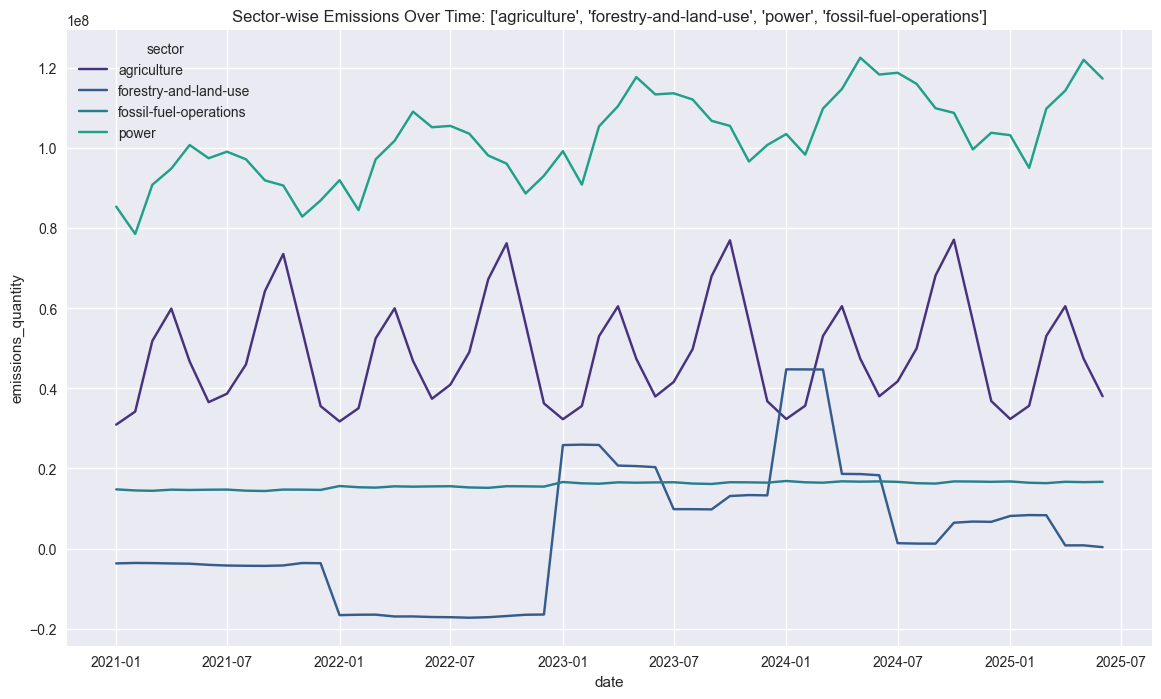

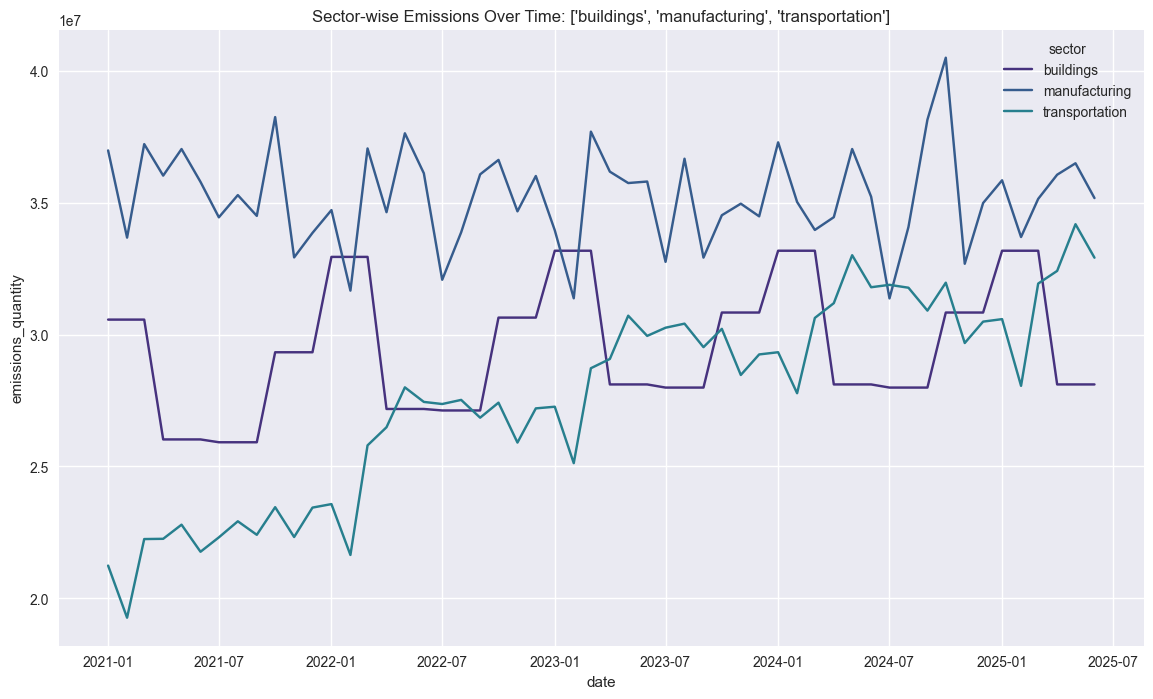

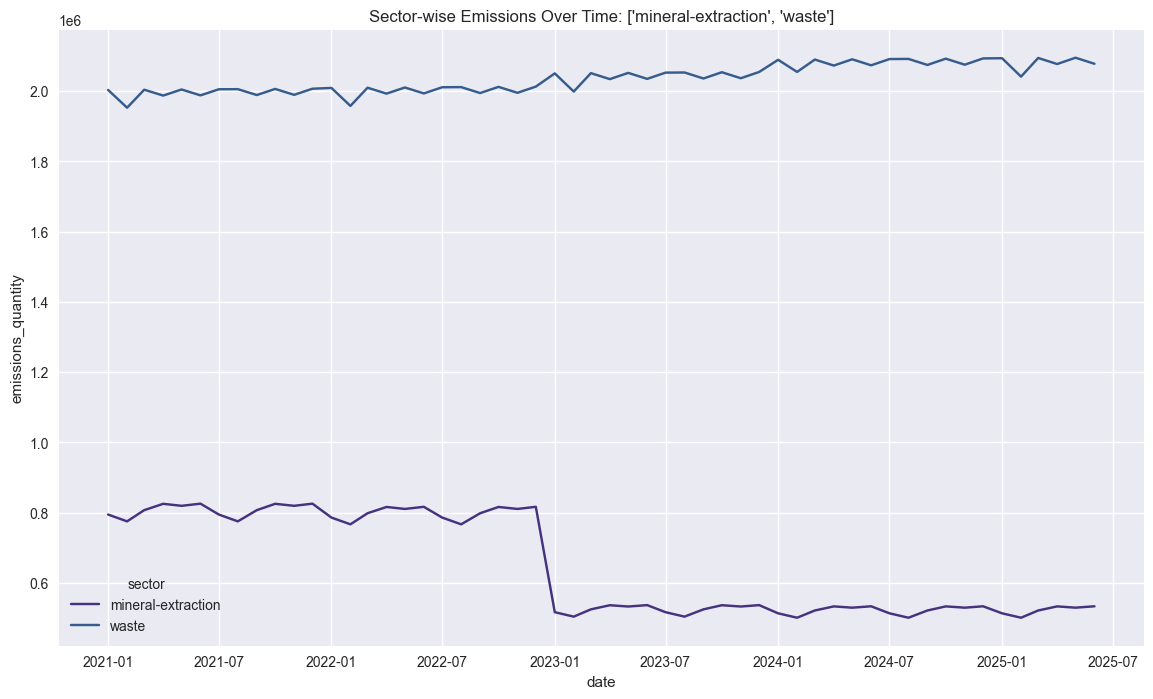

In [127]:
# Sector-wise over time (Top 5)
top_sectors1 = ['agriculture','forestry-and-land-use','power','fossil-fuel-operations']
top_sectors2 = ['buildings','manufacturing','transportation']
top_sectors3=['mineral-extraction','waste']

def timelineCombo(top_sectors):
    sector_trend = (df_imputed[df_imputed['sector'].isin(top_sectors)]
                    .groupby(['year','month','sector'])['emissions_quantity']
                    .sum()
                    .reset_index())
    sector_trend['date'] = pd.to_datetime(sector_trend[['year','month']].assign(day=1))

    plt.figure(figsize=(14,8))
    sns.lineplot(data=sector_trend, x="date", y="emissions_quantity", hue="sector")
    plt.title(f"Sector-wise Emissions Over Time: {top_sectors}")
    plt.show()

timelineCombo(top_sectors1)
timelineCombo(top_sectors2)
timelineCombo(top_sectors3)



# Prophet Testing

14:32:04 - cmdstanpy - INFO - Chain [1] start processing


Train size: 36 | range: 2021-01-01 → 2023-12-01
Test  size: 17 | range: 2024-01-01 → 2025-05-01


14:32:04 - cmdstanpy - INFO - Chain [1] done processing



Evaluation (Test: 2024-01 → 2025-05)
MAE   : 6282430.251
RMSE  : 7728083.266
MAPE  : 2.326% (computed on non-zero actuals only)
sMAPE : 2.287%


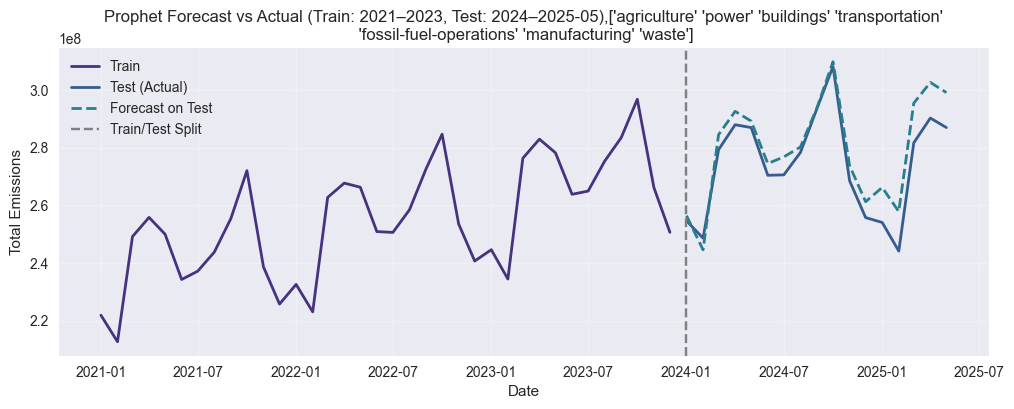

In [128]:
sectors=['waste','manufacturing','fossil-fuel-operations','transportation','power','agriculture','buildings']
df_final=df_imputed[df_imputed['sector'].isin(sectors)]
prophet_mape=sectorWise(df_final)

# Classical Methods: Prophet, Holt-Winters, ARIMA, SARIMA 

In [129]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439021 entries, 0 to 2293427
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   source_name             1439021 non-null  object        
 1   sector                  1439021 non-null  object        
 2   subsector               1439021 non-null  object        
 3   start_time              1439021 non-null  datetime64[ns]
 4   end_time                1439021 non-null  datetime64[ns]
 5   gas                     1439021 non-null  object        
 6   emissions_quantity      1439021 non-null  float64       
 7   temporal_granularity    1439021 non-null  object        
 8   activity                1439021 non-null  float64       
 9   activity_units          1439021 non-null  object        
 10  emissions_factor        1439021 non-null  float64       
 11  emissions_factor_units  1439021 non-null  object        
 12  capacity           

14:32:05 - cmdstanpy - INFO - Chain [1] start processing


Train size: 36 | range: 2021-01-01 → 2023-12-01
Test  size: 17 | range: 2024-01-01 → 2025-05-01


14:32:05 - cmdstanpy - INFO - Chain [1] done processing
/Users/anushkachaubey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anushkachaubey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/anushkachaubey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anushkachaubey/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/anushkachaubey/Library/Python/3.9/lib/python/site-pac


Evaluation (Test: 2024-01 → 2025-05)
MAPE  : 2.326% (computed on non-zero actuals only)


/Users/anushkachaubey/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Prophet MAPE: 2.33%
Holt-Winters MAPE: 2.76%
ARIMA MAPE: 10.79%
SARIMA MAPE: 3.67%


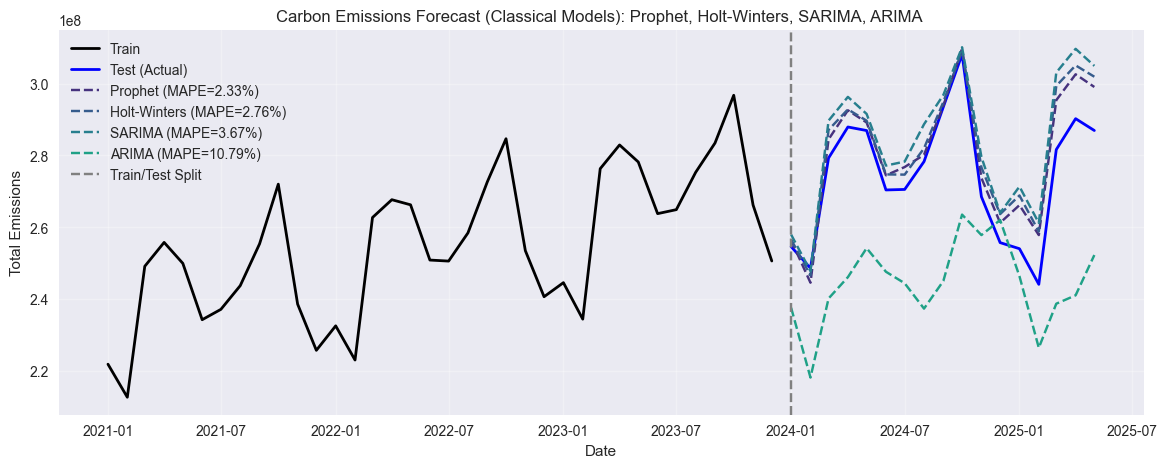

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# =========================================================
# 1) Train/Test split (Train: 2021-01 → 2023-12, Test: 2024-01 → 2025-05)
# =========================================================
df_monthly = df_final.groupby('start_time')['emissions_quantity'].sum().reset_index()
df_monthly = df_monthly.rename(columns={'start_time':'ds','emissions_quantity':'y'})
train = df_monthly[(df_monthly['ds'] >= '2021-01-01') & (df_monthly['ds'] < '2024-01-01')]
test  = df_monthly[(df_monthly['ds'] >= '2024-01-01') & (df_monthly['ds'] <= '2025-05-01')]

y_train = train.set_index('ds')['y']
y_test  = test.set_index('ds')['y']

print(f"Train size: {len(train)} | range: {train['ds'].min().date()} → {train['ds'].max().date()}")
print(f"Test  size: {len(test)} | range: {test['ds'].min().date()} → {test['ds'].max().date()}")
# =========================================================
# 1.2) Fit Prophet on training data
# =========================================================
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(train)
# =========================================================
# 1.3) Create futures
# =========================================================
# (periods = number of months from end of train to 2025-05 inclusive)
last_needed = pd.Timestamp('2025-05-01')
months_needed = (last_needed.to_period('M') - train['ds'].max().to_period('M')).n + 1
future_full = m.make_future_dataframe(periods=months_needed, freq='MS')
forecast_full = m.predict(future_full)
future_test = pd.DataFrame({'ds': test['ds']})
forecast_test_only = m.predict(future_test)[['ds', 'yhat']]
missing_in_forecast = sorted(set(test['ds']) - set(forecast_test_only['ds']))
if missing_in_forecast:
    print("Warning: these test dates are missing predictions:", missing_in_forecast)

eval_df = test.merge(forecast_test_only, on='ds', how='left').copy()
if eval_df['yhat'].isna().any() or eval_df['y'].isna().any():
    n_nan_pred = eval_df['yhat'].isna().sum()
    n_nan_true = eval_df['y'].isna().sum()
    raise ValueError(f"Found NaNs after alignment -> yhat NaNs: {n_nan_pred}, y NaNs: {n_nan_true}. "
                    "Check the monthly continuity or date alignment.")
y_true = eval_df['y'].to_numpy()
y_pred = eval_df['yhat'].to_numpy()
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# Robust MAPE: ignore zero-true months in the percentage calc
nonzero_mask = y_true != 0
if nonzero_mask.sum() == 0:
    mape = np.nan
else:
    mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
# sMAPE handles zeros better
smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
print("\nEvaluation (Test: 2024-01 → 2025-05)")
print(f"MAPE  : {mape:.3f}% (computed on non-zero actuals only)")

# -------------------------
# (2) Holt-Winters (monthly seasonality)
# -------------------------
hw_model = ExponentialSmoothing(y_train,
                                trend='add',
                                seasonal='add',
                                seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(y_test))

# -------------------------
# (3) ARIMA
# -------------------------
arima_model = ARIMA(y_train, order=(12,1,12))  
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(len(y_test))

# Seasonal ARIMA
import pmdarima as pm

sarima_model = pm.auto_arima(y_train,
                             seasonal=True,
                             m=12,  # 12 months in a seasonal cycle
                             stepwise=True,
                             suppress_warnings=True)
sarima_forecast = sarima_model.predict(n_periods=len(y_test))

sarima_mape = mean_absolute_percentage_error(y_test, sarima_forecast) * 100
# -------------------------
# Evaluate MAPE
# -------------------------
hw_mape = mean_absolute_percentage_error(y_test, hw_forecast) * 100
arima_mape = mean_absolute_percentage_error(y_test, arima_forecast) * 100
print(f"Prophet MAPE: {prophet_mape:.2f}%")
print(f"Holt-Winters MAPE: {hw_mape:.2f}%")
print(f"ARIMA MAPE: {arima_mape:.2f}%")
print(f"SARIMA MAPE: {sarima_mape:.2f}%")



# -------------------------
# Plot Comparison
# -------------------------


plt.figure(figsize=(14,5))
plt.plot(train['ds'], train['y'], label="Train", color = 'black', linewidth=2)
plt.plot(test['ds'], test['y'], label="Test (Actual)", color='blue',linewidth=2)

# Prophet forecast (assuming you have eval_df with 'ds','yhat')
plt.plot(eval_df['ds'], eval_df['yhat'], '--', label=f"Prophet (MAPE={prophet_mape:.2f}%)")

# Holt-Winters forecast
plt.plot(test['ds'], hw_forecast, '--', label=f"Holt-Winters (MAPE={hw_mape:.2f}%)")

# ARIMA forecast
plt.plot(test['ds'], sarima_forecast, '--', label=f"SARIMA (MAPE={sarima_mape:.2f}%)")
plt.plot(test['ds'], arima_forecast, '--', label=f"ARIMA (MAPE={arima_mape:.2f}%)")


plt.axvline(pd.Timestamp('2024-01-01'), color='gray', linestyle='--', label="Train/Test Split")
plt.title("Carbon Emissions Forecast (Classical Models): Prophet, Holt-Winters, SARIMA, ARIMA ")
plt.xlabel("Date"); plt.ylabel("Total Emissions")
plt.legend(); plt.grid(alpha=0.3)
plt.show()


# ML Methods RandomForest, GradientBoosting, XGBoost, SVR

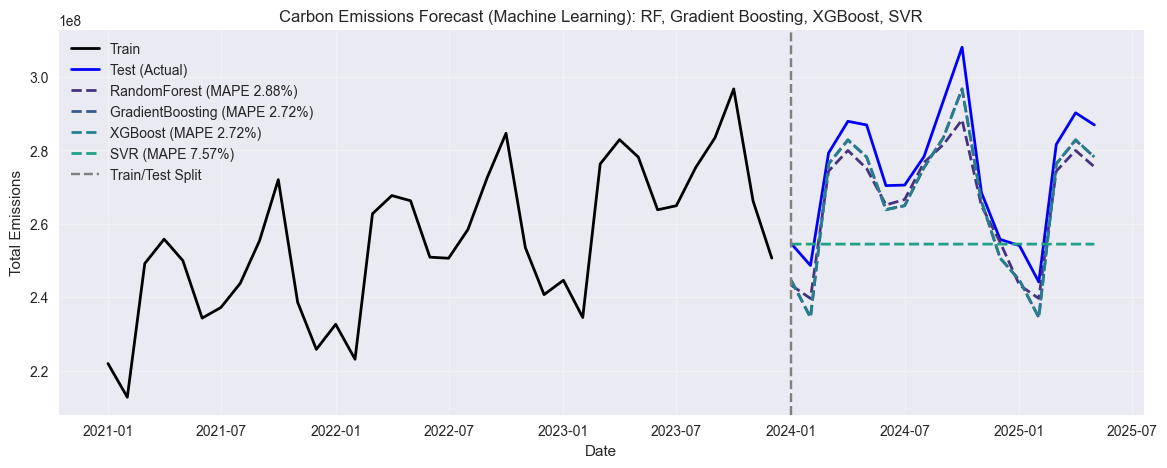


Model Comparison:
RandomForest: 2.88%
GradientBoosting: 2.72%
XGBoost: 2.72%
SVR: 7.57%


In [131]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# ---------------------------
# Feature Engineering
# ---------------------------
def create_features(df_final):
    df_monthly = df_final.groupby('start_time')['emissions_quantity'].sum().reset_index()
    df_monthly = df_monthly.rename(columns={'start_time':'ds','emissions_quantity':'y'})
    df = df_monthly.copy()
    df['year'] = df['ds'].dt.year
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
    df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
    return df

df_ml = create_features(df_final)

# Train/Test split (same as earlier)
train_ml = df_ml[(df_ml['ds'] >= '2021-01-01') & (df_ml['ds'] < '2024-01-01')]
test_ml  = df_ml[(df_ml['ds'] >= '2024-01-01') & (df_ml['ds'] <= '2025-05-01')]

X_train = train_ml.drop(columns=['ds','y'])
y_train = train_ml['y']
X_test  = test_ml.drop(columns=['ds','y'])
y_test  = test_ml['y']

# ---------------------------
# Machine Learning Models
# ---------------------------

models = {
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42),
    "SVR": SVR(kernel='rbf', C=200, gamma=0.1)
}

results = {}

import matplotlib.pyplot as plt

# ---------------------------
# Train ML models and store predictions
# ---------------------------
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    results[name] = mape


# ---------------------------
# Plot Train, Test, and Predictions
# ---------------------------
plt.figure(figsize=(14,5))

# Training data
plt.plot(train_ml['ds'], y_train, label="Train", color="black", linewidth=2)

# Test actual
plt.plot(test_ml['ds'], y_test, label="Test (Actual)", color="blue", linewidth=2)

# Forecasts from ML models
for name, y_pred in predictions.items():
    plt.plot(test_ml['ds'], y_pred, '--', label=f"{name} (MAPE {results[name]:.2f}%)", linewidth=2)

# Vertical line for train/test split
plt.axvline(pd.Timestamp("2024-01-01"), color="gray", linestyle="--", label="Train/Test Split")

plt.title("Carbon Emissions Forecast (Machine Learning): RF, Gradient Boosting, XGBoost, SVR")
plt.xlabel("Date")
plt.ylabel("Total Emissions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# ---------------------------
# Compare All Models
# ---------------------------
print("\nModel Comparison:")
for model, mape in results.items():
    print(f"{model}: {mape:.2f}%")


# Save Data

In [132]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439021 entries, 0 to 2293427
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   source_name             1439021 non-null  object        
 1   sector                  1439021 non-null  object        
 2   subsector               1439021 non-null  object        
 3   start_time              1439021 non-null  datetime64[ns]
 4   end_time                1439021 non-null  datetime64[ns]
 5   gas                     1439021 non-null  object        
 6   emissions_quantity      1439021 non-null  float64       
 7   temporal_granularity    1439021 non-null  object        
 8   activity                1439021 non-null  float64       
 9   activity_units          1439021 non-null  object        
 10  emissions_factor        1439021 non-null  float64       
 11  emissions_factor_units  1439021 non-null  object        
 12  capacity           

In [133]:
df_final.to_csv('finalDataProphet.csv')

# PINN Testing 

In [135]:
# =========================================================
# 0) Imports
# =========================================================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from prophet import Prophet

# =========================================================
# 1) Prepare India data
# =========================================================
df_india=df_final.copy()

# Aggregate monthly totals
df_monthly = df_india.groupby('start_time').agg({
    'emissions_quantity':'sum',
    'activity':'sum',
    'capacity':'sum',
    'capacity_factor':'mean'
}).reset_index()

# rename for clarity
df_monthly = df_monthly.rename(columns={
    'start_time':'ds',
    'emissions_quantity':'y',
    'activity':'activity',
    'capacity':'capacity',
    'capacity_factor':'capacity_factor'
})

# =========================================================
# 2) Train/Test split by date
# =========================================================
train = df_monthly[(df_monthly['ds'] >= '2021-01-01') & (df_monthly['ds'] < '2024-01-01')].copy()
test  = df_monthly[(df_monthly['ds'] >= '2024-01-01') & (df_monthly['ds'] <= '2025-05-01')].copy()

X_train = train[['activity','capacity','capacity_factor']].values
y_train = train['y'].values
X_test  = test[['activity','capacity','capacity_factor']].values
y_test  = test['y'].values

# =========================================================
# 3) Scale features and target
# =========================================================
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

# =========================================================
# 4) Define PINN with MAPE-compatible loss
# =========================================================
class PINN(nn.Module):
    def __init__(self, input_dim=3, hidden=64):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.Tanh(),
            nn.Linear(hidden, hidden),
            nn.Tanh(),
            nn.Linear(hidden,1)
        )
    def forward(self, x):
        return self.net(x)

# Differentiable MAPE loss
class MAPELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
    def forward(self, y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true) / (torch.abs(y_true) + self.eps))

# =========================================================
# 5) Prepare PyTorch DataLoader
# =========================================================
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1,1)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Instantiate model, optimizer, loss
model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = MAPELoss()

# =========================================================
# 6) Train PINN
# =========================================================
for epoch in range(5000):
    for xb, yb in loader:
        optimizer.zero_grad()
        y_pred = model(xb)
        loss = loss_fn(y_pred, yb)
        loss.backward()
        optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, MAPE Loss: {loss.item():.6f}")

# =========================================================
# 7) PINN predictions (scaled -> original)
# =========================================================
model.eval()
with torch.no_grad():
    y_pinn_train_scaled = model(torch.tensor(X_train_scaled, dtype=torch.float32)).numpy().flatten()
    y_pinn_test_scaled  = model(torch.tensor(X_test_scaled, dtype=torch.float32)).numpy().flatten()

y_pinn_train = scaler_y.inverse_transform(y_pinn_train_scaled.reshape(-1,1)).flatten()
y_pinn_test  = scaler_y.inverse_transform(y_pinn_test_scaled.reshape(-1,1)).flatten()

train['pinn_pred'] = y_pinn_train
train['residual'] = train['y'] - train['pinn_pred']
test['pinn_pred']  = y_pinn_test
test['residual']   = test['y'] - test['pinn_pred']

# =========================================================
# 8A) Residual modeling with XGBoost
# =========================================================
# Simple lag features
train['res_lag1'] = train['residual'].shift(1).fillna(0)
train['res_lag2'] = train['residual'].shift(2).fillna(0)
test['res_lag1']  = list(train['residual'].iloc[-2:]) + list(test['residual'].iloc[:-2])
test['res_lag2']  = list(train['residual'].iloc[-1:]) + list(test['residual'].iloc[:-1])

X_res_train = train[['res_lag1','res_lag2','activity','capacity','capacity_factor']]
y_res_train = train['residual']
X_res_test  = test[['res_lag1','res_lag2','activity','capacity','capacity_factor']]

dtrain = xgb.DMatrix(X_res_train, y_res_train)
dtest  = xgb.DMatrix(X_res_test)
params = {'objective':'reg:squarederror','verbosity':0}
bst = xgb.train(params, dtrain, num_boost_round=300)

res_pred_xgb = bst.predict(dtest)
final_pred_xgb = test['pinn_pred'].values + res_pred_xgb

# =========================================================
# 8B) Residual modeling with Prophet
# =========================================================
train_res = train[['ds','residual']].rename(columns={'residual':'y'})
test_res  = test[['ds','residual']].rename(columns={'residual':'y'})

m_res = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m_res.fit(train_res)

future_res = m_res.make_future_dataframe(periods=len(test_res), freq='MS')
forecast_res = m_res.predict(future_res)
res_pred_prophet = forecast_res['yhat'].iloc[len(train_res):].values
final_pred_prophet = test['pinn_pred'].values + res_pred_prophet

# =========================================================
# 9) Evaluation metrics
# =========================================================
def robust_mape(y_true, y_pred):
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def compute_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape_val = robust_mape(y_true, y_pred)
    smape_val = smape(y_true, y_pred)
    return pd.DataFrame({
        'Model': [name],
        'MAPE (%)': [mape_val],
        'MAE': [mae],
        'RMSE': [rmse],
        'sMAPE (%)': [smape_val]
    })

y_true_test = test['y'].values
df_metrics = pd.concat([
    compute_metrics(y_true_test, y_pinn_test, 'PINN-only'),
    compute_metrics(y_true_test, final_pred_xgb, 'PINN + XGBoost'),
    compute_metrics(y_true_test, final_pred_prophet, 'PINN + Prophet')
], ignore_index=True)

print(df_metrics)


Epoch 0, MAPE Loss: 0.801941
Epoch 500, MAPE Loss: 0.670678
Epoch 1000, MAPE Loss: 1.127998
Epoch 1500, MAPE Loss: 0.973725
Epoch 2000, MAPE Loss: 0.532974
Epoch 2500, MAPE Loss: 0.807580
Epoch 3000, MAPE Loss: 0.775125
Epoch 3500, MAPE Loss: 0.803445
Epoch 4000, MAPE Loss: 1.231480
Epoch 4500, MAPE Loss: 0.861639


14:32:59 - cmdstanpy - INFO - Chain [1] start processing
14:33:00 - cmdstanpy - INFO - Chain [1] done processing


            Model  MAPE (%)           MAE          RMSE  sMAPE (%)
0       PINN-only  7.935678  2.247159e+07  2.638487e+07   8.370128
1  PINN + XGBoost  4.392745  1.226784e+07  1.525757e+07   4.492719
2  PINN + Prophet  1.590085  4.258300e+06  5.250521e+06   1.593525


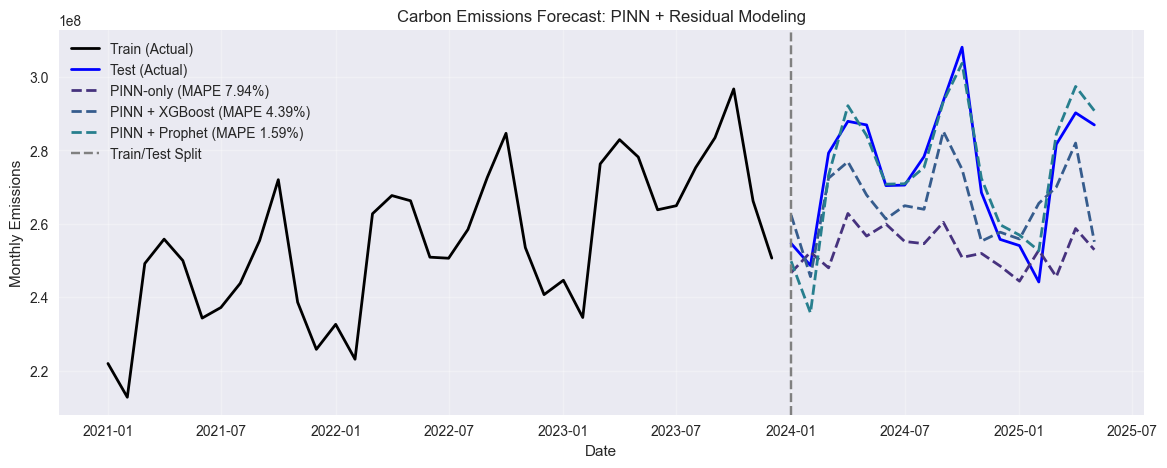

In [136]:
import matplotlib.pyplot as plt

# Collect predictions and their names
predictions = {
    "PINN-only": y_pinn_test,
    "PINN + XGBoost": final_pred_xgb,
    "PINN + Prophet": final_pred_prophet
}

# Compute MAPE for annotation
results = {name: robust_mape(test['y'].values, y_pred) for name, y_pred in predictions.items()}

plt.figure(figsize=(14,5))

# Training data
plt.plot(train['ds'], train['y'], label="Train (Actual)", color="black", linewidth=2)

# Test actual
plt.plot(test['ds'], test['y'], label="Test (Actual)", color="blue", linewidth=2)

# Forecasts from models
for name, y_pred in predictions.items():
    plt.plot(test['ds'], y_pred, '--', label=f"{name} (MAPE {results[name]:.2f}%)", linewidth=2)

# Vertical line for train/test split
plt.axvline(pd.Timestamp("2024-01-01"), color="gray", linestyle="--", label="Train/Test Split")

plt.title("Carbon Emissions Forecast: PINN + Residual Modeling")
plt.xlabel("Date")
plt.ylabel("Monthly Emissions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# TOP 5 Models: PINN + Prophet, Prophet, XGBoost, PINN + XGBoost, PINN

In [138]:
# =========================================================
# 0) Imports
# =========================================================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from prophet import Prophet

# =========================================================
# 1) Prepare India data
# =========================================================
df_india=df_final.copy()

# Aggregate monthly totals
df_monthly = df_india.groupby('start_time').agg({
    'emissions_quantity':'sum',
    'activity':'sum',
    'capacity':'sum',
    'capacity_factor':'mean'
}).reset_index()

# rename for clarity
df_monthly = df_monthly.rename(columns={
    'start_time':'ds',
    'emissions_quantity':'y',
    'activity':'activity',
    'capacity':'capacity',
    'capacity_factor':'capacity_factor'
})

# =========================================================
# 2) Train/Test split by date
# =========================================================
train = df_monthly[(df_monthly['ds'] >= '2021-01-01') & (df_monthly['ds'] < '2024-01-01')].copy()
test  = df_monthly[(df_monthly['ds'] >= '2024-01-01') & (df_monthly['ds'] <= '2025-05-01')].copy()

X_train = train[['activity','capacity','capacity_factor']].values
y_train = train['y'].values
X_test  = test[['activity','capacity','capacity_factor']].values
y_test  = test['y'].values

# =========================================================
# 3) Scale features and target
# =========================================================
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1)).flatten()

14:33:22 - cmdstanpy - INFO - Chain [1] start processing
14:33:22 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE: 2.33%
XGBoost MAPE: 2.72%


14:33:26 - cmdstanpy - INFO - Chain [1] start processing
14:33:26 - cmdstanpy - INFO - Chain [1] done processing



 -------- RESULTS --------
            Model  MAPE (%)
0       PINN-only  8.030183
1  PINN + XGBoost  4.340307
2  PINN + Prophet  1.700776
3         Prophet  2.325901
4         XGBoost  2.716110


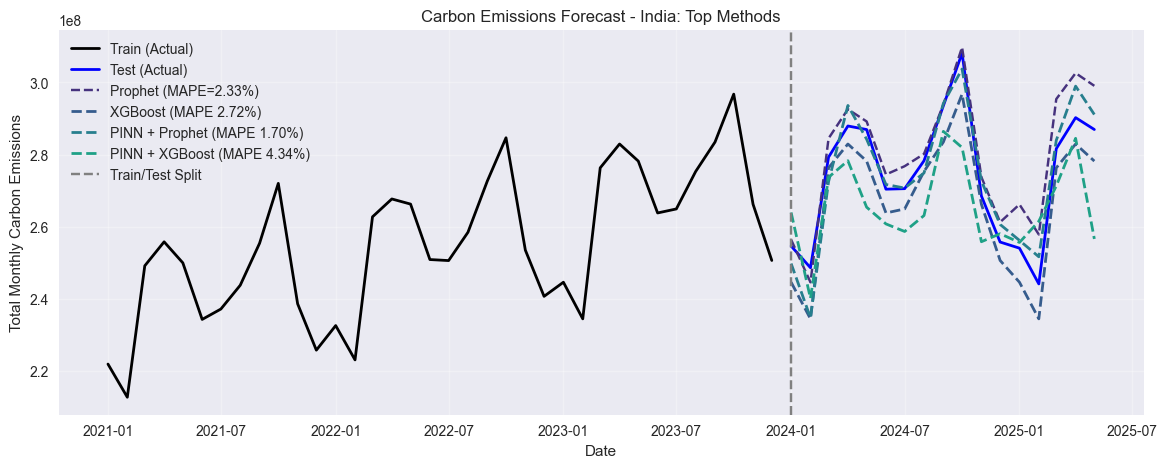

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from prophet import Prophet


# =========================================================
# 1) PROPHET
# =========================================================
m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(train)
# Create futures
last_needed = pd.Timestamp('2025-05-01')
months_needed = (last_needed.to_period('M') - train['ds'].max().to_period('M')).n + 1
future_full = m.make_future_dataframe(periods=months_needed, freq='MS')
forecast_full = m.predict(future_full)
future_test = pd.DataFrame({'ds': test['ds']})
forecast_test_only = m.predict(future_test)[['ds', 'yhat']]
missing_in_forecast = sorted(set(test['ds']) - set(forecast_test_only['ds']))
if missing_in_forecast:
    print("Warning: these test dates are missing predictions:", missing_in_forecast)
# Evaluation (MAPE) on 2024-01 → 2025-05
eval_df = test.merge(forecast_test_only, on='ds', how='left').copy()
if eval_df['yhat'].isna().any() or eval_df['y'].isna().any():
    n_nan_pred = eval_df['yhat'].isna().sum()
    n_nan_true = eval_df['y'].isna().sum()
    raise ValueError(f"Found NaNs after alignment -> yhat NaNs: {n_nan_pred}, y NaNs: {n_nan_true}. "
                    "Check the monthly continuity or date alignment.")
y_true = eval_df['y'].to_numpy()
y_pred = eval_df['yhat'].to_numpy()
nonzero_mask = y_true != 0
if nonzero_mask.sum() == 0:
    mape = np.nan
else:
    mape = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
prophet_mape=mape
print(f"Prophet MAPE: {prophet_mape:.2f}%")


# ---------------------------
# 2) XGBoost
# ---------------------------
def create_features(df_final):
    df_monthly = df_final.groupby('start_time')['emissions_quantity'].sum().reset_index()
    df_monthly = df_monthly.rename(columns={'start_time':'ds','emissions_quantity':'y'})
    df = df_monthly.copy()
    df['year'] = df['ds'].dt.year
    df['month'] = df['ds'].dt.month
    df['quarter'] = df['ds'].dt.quarter
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
    df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
    return df

df_ml = create_features(df_final)

# Train/Test split (same as earlier)
train_ml = df_ml[(df_ml['ds'] >= '2021-01-01') & (df_ml['ds'] < '2024-01-01')]
test_ml  = df_ml[(df_ml['ds'] >= '2024-01-01') & (df_ml['ds'] <= '2025-05-01')]

X_train_ml = train_ml.drop(columns=['ds','y'])
y_train_ml = train_ml['y']
X_test_ml  = test_ml.drop(columns=['ds','y'])
y_test_ml  = test_ml['y']

models = {
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42),
}

resultsML = {}
predictionsML = {}

for name, model in models.items():
    model.fit(X_train_ml, y_train_ml)
    y_pred = model.predict(X_test_ml)
    predictionsML[name] = y_pred
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    resultsML[name] = mape
    print(f"{name} MAPE: {resultsML[name]:.2f}%")
# ---------------------------
# 3) PINN
# ---------------------------
# Define PINN with MAPE-compatible loss
class PINN(nn.Module):
    def __init__(self, input_dim=3, hidden=64):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.Tanh(),
            nn.Linear(hidden, hidden),
            nn.Tanh(),
            nn.Linear(hidden,1)
        )
    def forward(self, x):
        return self.net(x)

# Differentiable MAPE loss
class MAPELoss(nn.Module):
    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
    def forward(self, y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true) / (torch.abs(y_true) + self.eps))

# Prepare PyTorch DataLoader
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1,1)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Instantiate model, optimizer, loss
model = PINN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = MAPELoss()

# Train PINN
for epoch in range(5000):
    for xb, yb in loader:
        optimizer.zero_grad()
        y_pred = model(xb)
        loss = loss_fn(y_pred, yb)
        loss.backward()
        optimizer.step()
    # if epoch % 500 == 0:
    #     print(f"Epoch {epoch}, MAPE Loss: {loss.item():.6f}")

# PINN predictions (scaled -> original)
model.eval()
with torch.no_grad():
    y_pinn_train_scaled = model(torch.tensor(X_train_scaled, dtype=torch.float32)).numpy().flatten()
    y_pinn_test_scaled  = model(torch.tensor(X_test_scaled, dtype=torch.float32)).numpy().flatten()

y_pinn_train = scaler_y.inverse_transform(y_pinn_train_scaled.reshape(-1,1)).flatten()
y_pinn_test  = scaler_y.inverse_transform(y_pinn_test_scaled.reshape(-1,1)).flatten()

train['pinn_pred'] = y_pinn_train
train['residual'] = train['y'] - train['pinn_pred']
test['pinn_pred']  = y_pinn_test
test['residual']   = test['y'] - test['pinn_pred']

# =========================================================
# 3A) Residual modeling with XGBoost
# =========================================================
# Simple lag features
train['res_lag1'] = train['residual'].shift(1).fillna(0)
train['res_lag2'] = train['residual'].shift(2).fillna(0)
test['res_lag1']  = list(train['residual'].iloc[-2:]) + list(test['residual'].iloc[:-2])
test['res_lag2']  = list(train['residual'].iloc[-1:]) + list(test['residual'].iloc[:-1])

X_res_train = train[['res_lag1','res_lag2','activity','capacity','capacity_factor']]
y_res_train = train['residual']
X_res_test  = test[['res_lag1','res_lag2','activity','capacity','capacity_factor']]

dtrain = xgb.DMatrix(X_res_train, y_res_train)
dtest  = xgb.DMatrix(X_res_test)
params = {'objective':'reg:squarederror','verbosity':0}
bst = xgb.train(params, dtrain, num_boost_round=300)

res_pred_xgb = bst.predict(dtest)
final_pred_xgb = test['pinn_pred'].values + res_pred_xgb

# =========================================================
# 3B) Residual modeling with Prophet
# =========================================================
train_res = train[['ds','residual']].rename(columns={'residual':'y'})
test_res  = test[['ds','residual']].rename(columns={'residual':'y'})

m_res = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m_res.fit(train_res)

future_res = m_res.make_future_dataframe(periods=len(test_res), freq='MS')
forecast_res = m_res.predict(future_res)
res_pred_prophet = forecast_res['yhat'].iloc[len(train_res):].values
final_pred_prophet = test['pinn_pred'].values + res_pred_prophet

# Evaluation metrics
def robust_mape(y_true, y_pred):
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def compute_metrics(y_true, y_pred, name):
    mape_val = robust_mape(y_true, y_pred)
    return pd.DataFrame({
        'Model': [name],
        'MAPE (%)': [mape_val],
    })

y_true_test = test['y'].values
df_metrics = pd.concat([
    compute_metrics(y_true_test, y_pinn_test, 'PINN-only'),
    compute_metrics(y_true_test, final_pred_xgb, 'PINN + XGBoost'),
    compute_metrics(y_true_test, final_pred_prophet, 'PINN + Prophet'),
    pd.DataFrame({'Model':['Prophet'], 'MAPE (%)':[prophet_mape],}),
    pd.DataFrame({'Model':['XGBoost'], 'MAPE (%)':[resultsML['XGBoost']],}),

], ignore_index=True)
print("\n",'-'*8,'RESULTS','-'*8)
print(df_metrics)

# Collect predictions and their names
predictionsPinn = {
    "PINN + Prophet": final_pred_prophet,
    "PINN + XGBoost": final_pred_xgb
}

resultsPinn = {name: robust_mape(test['y'].values, y_pred) for name, y_pred in predictionsPinn.items()}

# =========================================================
# 4) PLOT
# =========================================================
plt.figure(figsize=(14,5))
# Training data
plt.plot(train['ds'], train['y'], label="Train (Actual)", color="black", linewidth=2)
# Test actual
plt.plot(test['ds'], test['y'], label="Test (Actual)", color="blue", linewidth=2)

# Forecasts from models
plt.plot(eval_df['ds'], eval_df['yhat'], '--', label=f"Prophet (MAPE={prophet_mape:.2f}%)")
for name, y_pred in predictionsML.items():
    plt.plot(test_ml['ds'], y_pred, '--', label=f"{name} (MAPE {resultsML[name]:.2f}%)", linewidth=2)
for name, y_pred in predictionsPinn.items():
    plt.plot(test['ds'], y_pred, '--', label=f"{name} (MAPE {resultsPinn[name]:.2f}%)", linewidth=2)

    
# Vertical line for train/test split
plt.axvline(pd.Timestamp("2024-01-01"), color="gray", linestyle="--", label="Train/Test Split")
plt.title("Carbon Emissions Forecast - India: Top Methods")
plt.xlabel("Date")
plt.ylabel("Total Monthly Carbon Emissions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


